In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
allSchools = pd.read_csv('allSchools.csv')
allSchools = allSchools.assign(date = pd.to_datetime(allSchools['date']))
for i in ['Santa Barbara', 'Riverside', 'Merced', 'Santa Cruz']: 
    allSchools = allSchools[allSchools['school'] != i]
sort = allSchools.sort_values('date')

In [3]:
first_day = sort['date'].iloc[0]
sort['days_past'] = sort['date'].apply(lambda x: (x-first_day).days)

In [4]:
sort

,school,date,content,word_count,state,month,days_past
606,Diego,2020-01-22,"Dear Students, UC San Diego Student Health Ser...",286,cal,1,0
254,Irvine,2020-01-22,ItÕs that time of year when many of us get run...,310,cal,1,0
357,Los Angeles,2020-01-23,"To the UCLA Community, As we approach the peak...",318,cal,1,1
607,Diego,2020-01-23,We are committed to keeping our campus communi...,502,cal,1,1
680,Florida,2020-01-24,JANUARY 24: GUIDANCE ON COVID-19\r\nUniversity...,99,fl,1,2
...,...,...,...,...,...,...,...
660,Austin,2020-05-23,Reimbursement for services no longer available...,15,tex,5,122
661,Austin,2020-05-24,City of Austin Stay Home Work SafeOrder - fro...,189,tex,5,123
662,Austin,2020-05-25,May 21-23 commencement and graduation ceremoni...,74,tex,5,124
663,Austin,2020-05-27,Online Classes Grading Policies: Undergraduate...,124,tex,5,126


In [5]:
sort['cum_sum_all'] = sort['word_count'].cumsum()

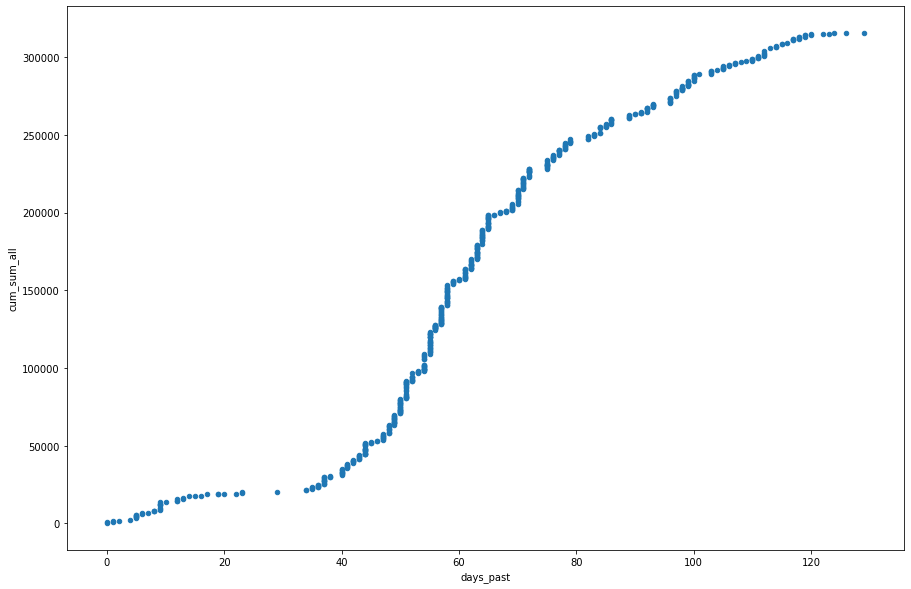

In [6]:
fig, ax = plt.subplots(figsize =(15,10))
sort[sort['state'] == 'fl'].plot(x = 'days_past',y= 'cum_sum_all', kind = 'scatter', ax = ax)
sort[sort['state'] == 'cal'].plot(x = 'days_past',y= 'cum_sum_all', kind = 'scatter', ax = ax)
sort[sort['state'] == 'tex'].plot(x = 'days_past',y= 'cum_sum_all', kind = 'scatter', ax = ax)

In [7]:
# fig.savefig('cdf.png')

[Text(0, 0.5, 'Word Count'), Text(0.5, 0, 'Date')]

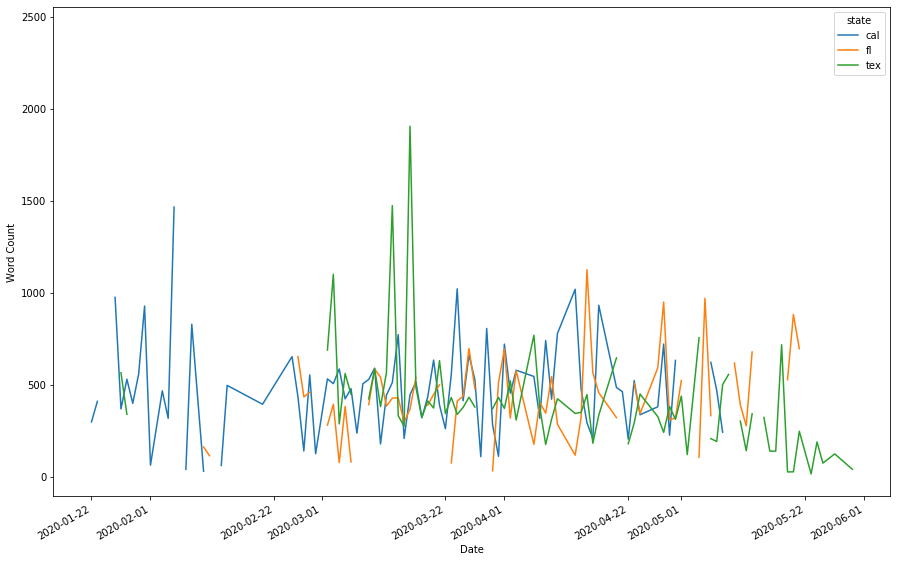

In [8]:
info = allSchools.groupby(["date","state"]).mean()
fig, ax = plt.subplots(figsize =(15,10))
info["word_count"].unstack().plot(ax=ax) 
ax.set(xlabel='Date', ylabel="Word Count")

In [9]:
sort['cum_sum_state'] = -1000

In [10]:
sort[sort['state'] == 'tex'].copy()['cum_sum_state'] = sort[sort['state'] == 'tex']['word_count'].cumsum()

In [11]:
whole_df = pd.DataFrame()
for i in ['cal', 'tex', 'fl']:
    piece = sort[sort['state'] == i].copy()
    piece['cum_sum_state'] = sort[sort['state'] == i]['word_count'].cumsum()
    whole_df = pd.concat([piece, whole_df])

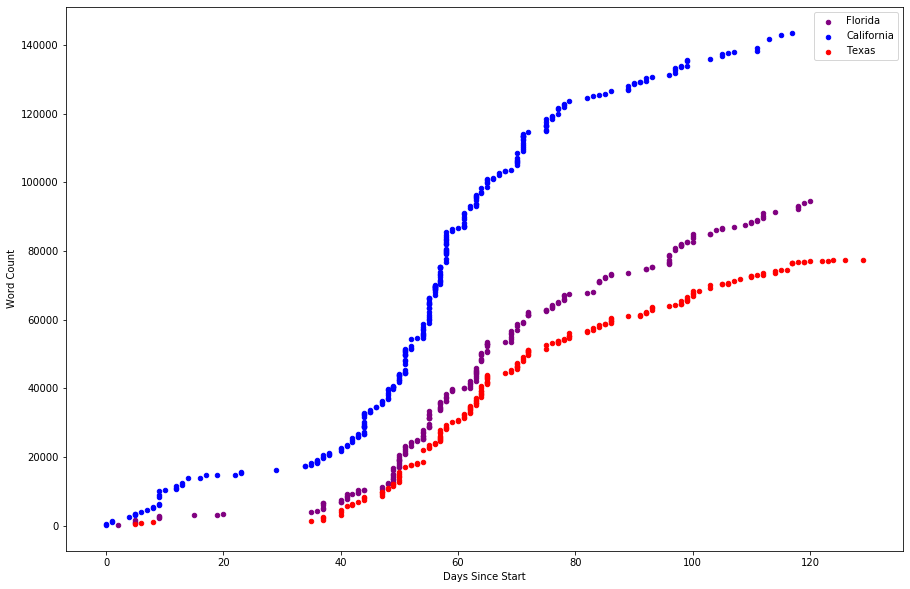

In [12]:
fig, ax = plt.subplots(figsize =(15,10))
whole_df[whole_df['state'] == 'fl'].plot(x = 'days_past',y= 'cum_sum_state', kind = 'scatter', ax = ax, color = 'purple')
whole_df[whole_df['state'] == 'cal'].plot(x = 'days_past',y= 'cum_sum_state', kind = 'scatter', ax = ax, color = 'blue')
whole_df[whole_df['state'] == 'tex'].plot(x = 'days_past',y= 'cum_sum_state', kind = 'scatter', ax = ax, color = 'red')
ax.set(xlabel='Days Since Start', ylabel="Word Count")
ax.legend(['Florida', 'California', 'Texas'])

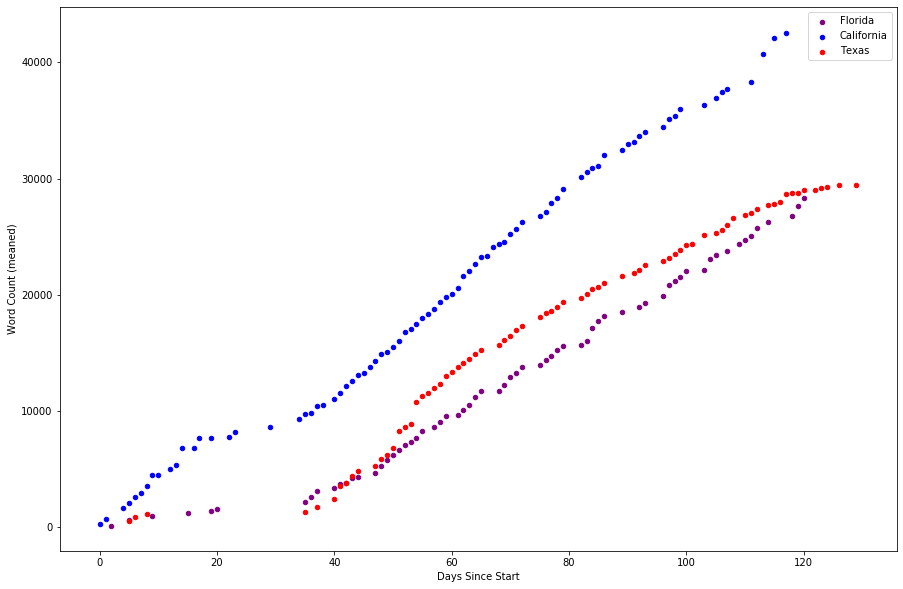

In [13]:
fig, ax = plt.subplots(figsize =(15,10))
whole_df = pd.DataFrame()
color = ['purple', 'blue', 'red']
j = 0
for i in ['fl', 'cal', 'tex']:
    piece = sort[sort['state'] == i].copy()
    piece = piece.groupby('days_past').mean()['word_count'].to_frame().reset_index()
    piece['cum_sum_state'] = piece['word_count'].cumsum()
    piece.plot(x = 'days_past', y = 'cum_sum_state' , kind = 'scatter', ax = ax, color = color[j])
    j+= 1
ax.set(xlabel='Days Since Start', ylabel="Word Count (meaned)")
ax.legend(['Florida', 'California', 'Texas'])

In [14]:
piece = sort[sort['state'] == i].copy()
piece = piece.groupby('days_past').mean()['word_count'].to_frame().reset_index()
piece['cum_sum_state'] = piece['word_count'].cumsum()
piece

,days_past,word_count,cum_sum_state
0,5,565.000000,565.000000
1,6,339.000000,904.000000
2,8,197.000000,1101.000000
3,35,228.000000,1329.000000
4,37,410.333333,1739.333333
...,...,...,...
69,122,15.000000,29022.758333
70,123,189.000000,29211.758333
71,124,74.000000,29285.758333
72,126,124.000000,29409.758333


In [15]:
sort

,school,date,content,word_count,state,month,days_past,cum_sum_all,cum_sum_state
606,Diego,2020-01-22,"Dear Students, UC San Diego Student Health Ser...",286,cal,1,0,286,-1000
254,Irvine,2020-01-22,ItÕs that time of year when many of us get run...,310,cal,1,0,596,-1000
357,Los Angeles,2020-01-23,"To the UCLA Community, As we approach the peak...",318,cal,1,1,914,-1000
607,Diego,2020-01-23,We are committed to keeping our campus communi...,502,cal,1,1,1416,-1000
680,Florida,2020-01-24,JANUARY 24: GUIDANCE ON COVID-19\r\nUniversity...,99,fl,1,2,1515,-1000
...,...,...,...,...,...,...,...,...,...
660,Austin,2020-05-23,Reimbursement for services no longer available...,15,tex,5,122,314923,-1000
661,Austin,2020-05-24,City of Austin Stay Home Work SafeOrder - fro...,189,tex,5,123,315112,-1000
662,Austin,2020-05-25,May 21-23 commencement and graduation ceremoni...,74,tex,5,124,315186,-1000
663,Austin,2020-05-27,Online Classes Grading Policies: Undergraduate...,124,tex,5,126,315310,-1000


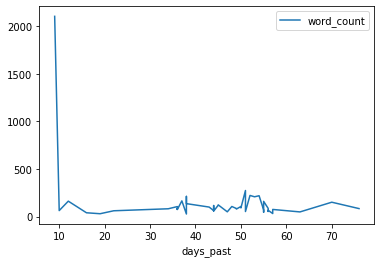

In [16]:
sort[sort['school'] == 'Davis'][['word_count', 'days_past']].plot(x  = 'days_past', y='word_count')

[Text(0, 0.5, 'Word Count'), Text(0.5, 0, 'Month')]

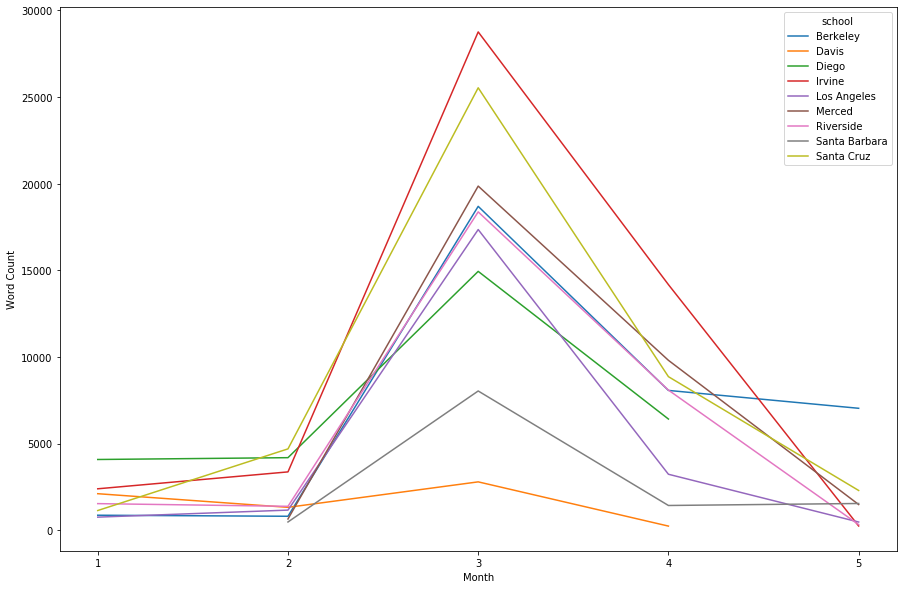

In [17]:
data = pd.read_csv("allSchools.csv")
cal_schools= data[data["state"]== "cal"].groupby(["month","school"]).sum()
fig, ax = plt.subplots(figsize =(15,10))
cal_schools["word_count"].unstack().plot(ax=ax)
ax.set_xticks([1,2,3,4,5])
ax.set(xlabel='Month', ylabel="Word Count")

In [42]:
data1 = pd.read_csv("allShools_sent.csv")
data1['date'] = pd.to_datetime(data['date'])

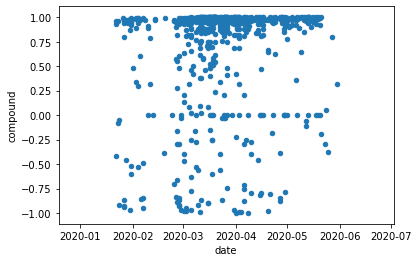

In [59]:
data1[['compound', 'date']].plot(kind = 'scatter', x = 'date', y = 'compound')

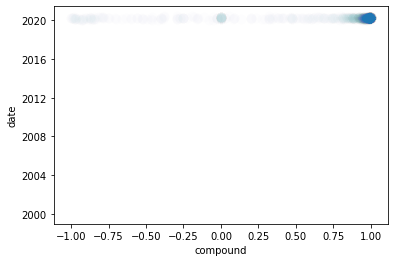

In [51]:
sn.scatterplot(x='compound', y='date', alpha=.007, data=data1, s=100,linestyle='None')

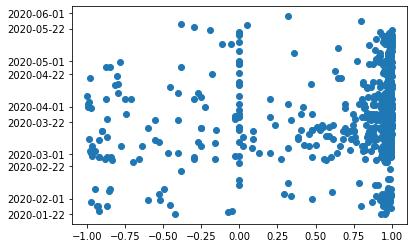

In [49]:
plt.plot(data1['compound'], data1['date'], linestyle='None', marker='o')

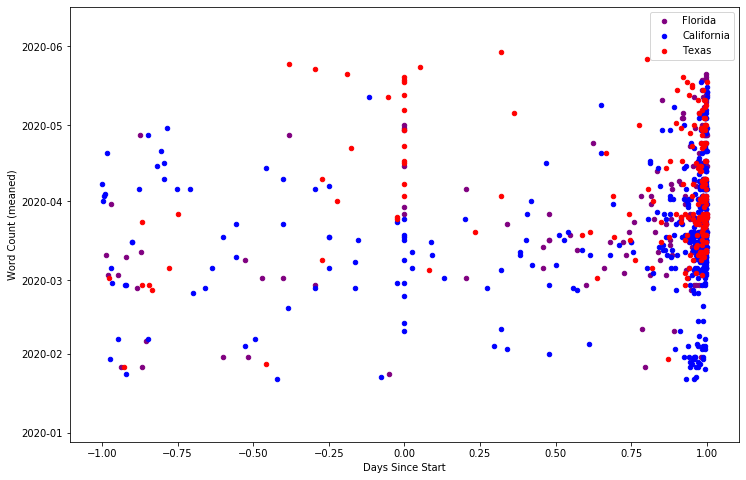

In [64]:
fig, ax = plt.subplots(figsize =(12,8))
whole_df = pd.DataFrame()
color = ['purple', 'blue', 'red']
j = 0
for i in ['fl', 'cal', 'tex']:
    data1[data1['state'] ==i].plot(x = 'compound', y = 'date' , kind = 'scatter', ax = ax, color = color[j])
    j+= 1
ax.set(xlabel='Days Since Start', ylabel="Word Count (meaned)")
ax.legend(['Florida', 'California', 'Texas'])